##  EDA of Credit card fraud detection

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
from scipy.stats import ttest_ind
from scipy import stats

#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTENC

In [4]:
# This function is used to calculate the shortest distance between two points on the Earth's surface, taking into account the Earth's ellipsoidal shape.
#from geopy.distance import geodesic 

In [5]:
# load the data 
data = pd.read_csv("Data_wrangle_credit_card_fraudv1.csv")

In [114]:
data.shape

(1852394, 31)

In [6]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019,1,1,0,0,31,adult
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019,1,1,0,0,41,adult
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019,1,1,0,0,57,senior
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019,1,1,0,1,52,senior
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019,1,1,0,3,33,adult


In [7]:
# extraxted day of week from 'trans_date_trans_time'
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['tr_day'] = data['trans_date_trans_time'].dt.dayofweek
data['tr_day_name'] = data['tr_day'].map(dict(enumerate(calendar.day_name)))

In [8]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'tr_year', 'tr_month', 'tr_day', 'tr_hour',
       'tr_minute', 'age', 'age_group', 'tr_day_name'],
      dtype='object')

In [9]:
# droped 'trans_date_trans_time' because already calculated age and extracted tr_hr,tr_year,tr_month etc 
data = data.drop(columns = ['trans_date_trans_time'])


In [10]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_long,is_fraud,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,-82.048315,0,2019,1,1,0,0,31,adult,Tuesday
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,-118.186462,0,2019,1,1,0,0,41,adult,Tuesday
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,-112.154481,0,2019,1,1,0,0,57,senior,Tuesday
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.561071,0,2019,1,1,0,1,52,senior,Tuesday
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,-78.632459,0,2019,1,1,0,3,33,adult,Tuesday


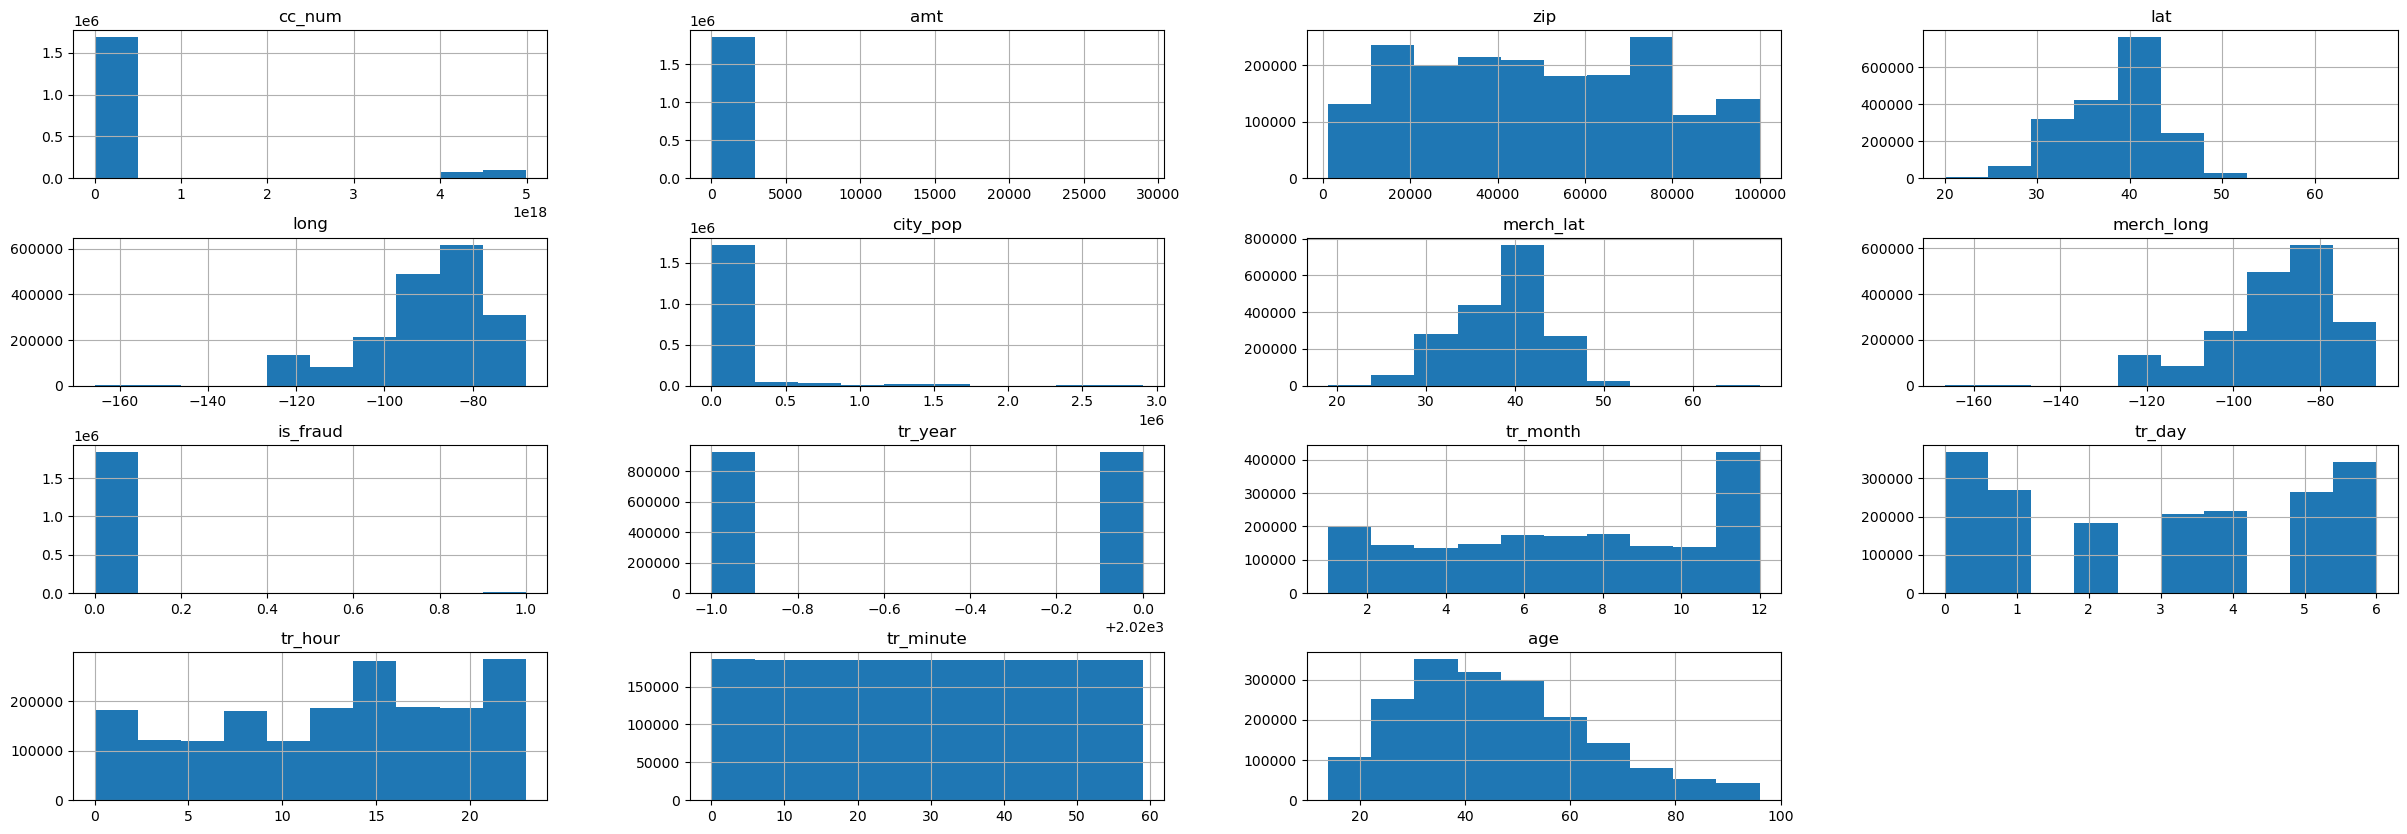

In [11]:
# histogram for all numerical features
data.hist(figsize=(30,10))
plt.subplots_adjust(hspace=0.4);

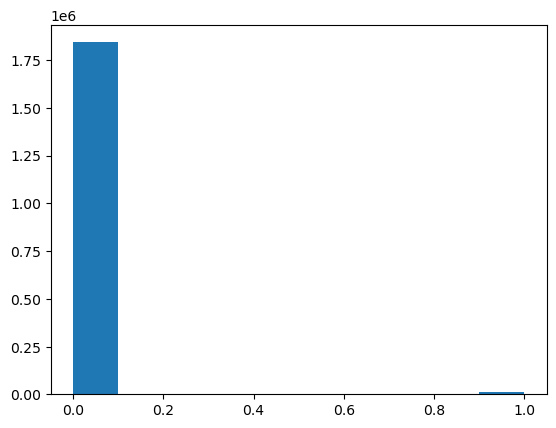

In [12]:
# target feature histogram
plt.hist(data['is_fraud'])
plt.show()

In [13]:
# target feature value_counts
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [14]:
# percentage of fraud in dataset i.e. 0.52% .
fraud_percent = (data['is_fraud'].sum())/len(data) * 100
print(f'farud percent is {fraud_percent:.2f}%')

farud percent is 0.52%


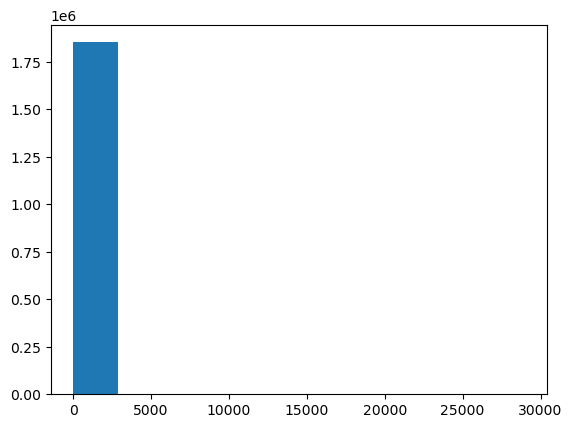

In [15]:
# histogram of amount feature
plt.hist(data['amt']) # use log scle for right or left skewed plot by using logerithmic scale we can easily interpret the data
plt.show()

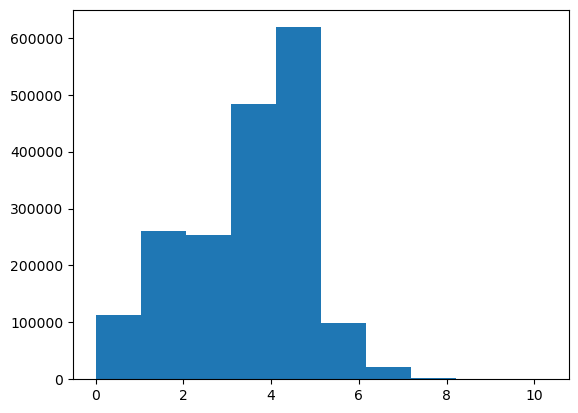

In [16]:
# histogram of amount on logerithmic scale 
plt.hist(np.log(data['amt'])) # use log scle for right or left skewed plot by using logerithmic scale we can easily interpret the data
plt.show() # X axis x=2→≈7.4, x=4→≈54.6, x=5→≈148, x=6→≈403, x=7→≈1,096, x=8→≈2,981, x=9→≈8,103, x=10→≈22,026

In [17]:
data['amt'].describe()

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [18]:
# Removed outliers from amount column and added new column amt_clean
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1
low_lim  = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

data['amt_clean'] = data.loc[(data['amt']>low_lim) & (data['amt'] < upper_lim),'amt']
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,is_fraud,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name,amt_clean
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0,2019,1,1,0,0,31,adult,Tuesday,4.97
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,0,2019,1,1,0,0,41,adult,Tuesday,107.23
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,0,2019,1,1,0,0,57,senior,Tuesday,NaN
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,0,2019,1,1,0,1,52,senior,Tuesday,45.00
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,0,2019,1,1,0,3,33,adult,Tuesday,41.96


# which column should i use for further analysis ? amt or clean_amt

In [19]:
# we removed outliers from amount columns so now it has nan values so we need to impute it 
data['amt_clean'].isna().value_counts()

amt_clean
False    1757323
True       95071
Name: count, dtype: int64

In [20]:
data['amt_clean'].isna().sum()

np.int64(95071)

In [21]:
data['amt_clean'].isna().any()

np.True_

In [22]:
# Imputation in amtclean column by using median of amount
median_val = data['amt'].median()
data['amt_clean'] = data['amt_clean'].fillna(median_val)

In [23]:
data['amt_clean'].isna().value_counts()


amt_clean
False    1852394
Name: count, dtype: int64

In [24]:
#data1['amt_clean'] = data['amt_clean']

In [25]:
# in clean amount column checked for fraud amount

fraud_amt = data.query('is_fraud == 1')['amt_clean']
fraud_amt 

2449       47.45
2472       11.52
2523       47.45
2546        7.03
2553       47.45
           ...  
1813872    47.45
1813949    47.45
1814016    47.45
1814204    47.45
1814246    47.45
Name: amt_clean, Length: 9651, dtype: float64

In [26]:
# outliers in amount columns
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1
low_lim  = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR

# All outliers: amt < low_lim OR amt > upper_lim
data['outliers_amount'] = data.loc[(data['amt'] < low_lim) | (data['amt'] > upper_lim), 'amt']


In [27]:
data['outliers_amount'].value_counts()

outliers_amount
200.79     22
196.16     22
195.20     22
200.73     21
195.01     21
           ..
307.99      1
259.84      1
2168.91     1
344.59      1
459.40      1
Name: count, Length: 41386, dtype: int64

In [28]:
# group by'merchant', 'is_fraud' on outlier amount and analysed merchant wise count of 'outliers_amount
# count merchant who has highest 'outliers_amount'

data.groupby(['merchant', 'is_fraud'])['outliers_amount'].count().sort_values(ascending=False).head(10)

merchant                           is_fraud
fraud_Boyer PLC                    0           429
fraud_Kilback LLC                  0           403
fraud_Bauch-Raynor                 0           383
fraud_Murray-Smitham               0           382
fraud_Kuhn LLC                     0           381
fraud_Schultz, Simonis and Little  0           380
fraud_Pacocha-O'Reilly             0           379
fraud_DuBuque LLC                  0           379
fraud_Goodwin-Nitzsche             0           378
fraud_Hudson-Ratke                 0           378
Name: outliers_amount, dtype: int64

In [29]:
# group by'merchant', 'is_fraud' on outlier amount and analysed which merchant wise sum of 'outliers_amount
# calculated sum of 'outliers_amount' for each merchant 
data.groupby(['merchant', 'is_fraud'])['outliers_amount'].sum().sort_values(ascending=False).head(10)

merchant                             is_fraud
fraud_Boyer PLC                      0           198732.00
fraud_Gislason Group                 0           194820.18
fraud_Kuhn LLC                       0           189567.88
fraud_Boyer-Haley                    0           183987.22
fraud_Pacocha-Bauch                  0           179657.05
fraud_Pfeffer and Sons               0           176096.55
fraud_Haley, Jewess and Bechtelar    0           169628.03
fraud_Lesch Ltd                      0           168745.27
fraud_Jewess LLC                     0           166569.84
fraud_Douglas, Schneider and Turner  0           166054.62
Name: outliers_amount, dtype: float64

In [30]:
# group by'merchant', 'is_fraud'  on 'outliers_amount' and analysed for city wise sum of 'outliers_amount
data.groupby(['city', 'is_fraud'])['outliers_amount'].sum().sort_values(ascending=False).head(10)

city          is_fraud
Meridian      0           278979.36
Brandon       0           227335.60
Houston       0           207428.48
Phoenix       0           203845.08
Philadelphia  0           202396.87
Grandview     0           197515.71
Indianapolis  0           192541.59
Newhall       0           192210.89
Hinckley      0           189328.95
Manistique    0           184777.77
Name: outliers_amount, dtype: float64

In [31]:
# group by'category', 'is_fraud' on 'outliers_amount' and analysed category wise sum of 'outliers_amount
data.groupby(['category', 'is_fraud'])['outliers_amount'].sum().sort_values(ascending=False).head(10)

category       is_fraud
shopping_pos   0           7484583.24
shopping_net   0           6283948.53
travel         0           6129573.08
misc_pos       0           3867015.17
grocery_pos    0           3782133.52
misc_net       0           3544377.98
shopping_net   1           2214847.64
entertainment  0           1479890.76
misc_net       1            944009.71
shopping_pos   1            928132.34
Name: outliers_amount, dtype: float64

(array([5.5999e+04, 1.9651e+04, 1.1075e+04, 6.2360e+03, 1.2870e+03,
        4.9100e+02, 1.9300e+02, 7.8000e+01, 3.5000e+01, 9.0000e+00]),
 array([ 5.26424339,  5.7651478 ,  6.26605221,  6.76695662,  7.26786103,
         7.76876544,  8.26966985,  8.77057426,  9.27147867,  9.77238308,
        10.27328749]),
 <BarContainer object of 10 artists>)

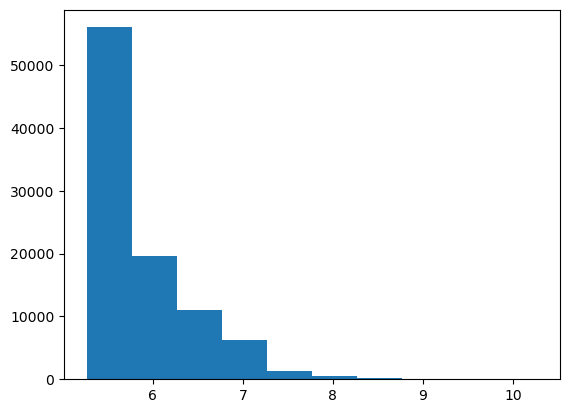

In [32]:
#X axis x=2→≈7.4, x=4→≈54.6, x=5→≈148, x=6→≈403, x=7→≈1,096, x=8→≈2,981, x=9→≈8,103, x=10→≈22,026
plt.hist(np.log(data['outliers_amount']))

In [33]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name,amt_clean,outliers_amount
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2019,1,1,0,0,31,adult,Tuesday,4.97,NaN
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2019,1,1,0,0,41,adult,Tuesday,107.23,NaN
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2019,1,1,0,0,57,senior,Tuesday,47.45,220.11
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2019,1,1,0,1,52,senior,Tuesday,45.00,NaN
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2019,1,1,0,3,33,adult,Tuesday,41.96,NaN


In [34]:
# converted dob and unixtime  into date_time formate
data['dob'] = pd.to_datetime(data['dob'])
data['unix_time'] = pd.to_datetime(data['unix_time'])
data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'tr_year', 'tr_month', 'tr_day', 'tr_hour', 'tr_minute', 'age',
       'age_group', 'tr_day_name', 'amt_clean', 'outliers_amount'],
      dtype='object')

In [35]:
#extracted numerical featur from data set
numerical_feature = data.select_dtypes(include = 'number')
numerical_feature

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,amt_clean,outliers_amount
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,0,31,4.97,NaN
1,630423337322,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,0,41,107.23,NaN
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2019,1,1,0,0,57,47.45,220.11
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1,52,45.00,NaN
4,375534208663984,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,3,33,41.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,0,2020,12,3,23,59,54,43.77,NaN
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0,2020,12,3,23,59,21,111.84,NaN
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0,2020,12,3,23,59,39,86.88,NaN
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,0,2020,12,3,23,59,55,7.99,NaN


In [36]:
numerical_feature.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat',
       'merch_long', 'is_fraud', 'tr_year', 'tr_month', 'tr_day', 'tr_hour',
       'tr_minute', 'age', 'amt_clean', 'outliers_amount'],
      dtype='object')

In [37]:
# extracted categorical fetures from data set
categorical_feature = data.select_dtypes(include = 'object')
categorical_feature

,merchant,category,first,last,gender,street,city,state,job,trans_num,age_group,tr_day_name
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,adult,Tuesday
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,adult,Tuesday
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,senior,Tuesday
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,senior,Tuesday
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,adult,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,fraud_Reilly and Sons,health_fitness,Michael,Olson,M,558 Michael Estates,Luray,MO,Town planner,9b1f753c79894c9f4b71f04581835ada,senior,Thursday
1852390,fraud_Hoppe-Parisian,kids_pets,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,Futures trader,2090647dac2c89a1d86c514c427f5b91,adult,Thursday
1852391,fraud_Rau-Robel,kids_pets,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,Musician,6c5b7c8add471975aa0fec023b2e8408,adult,Thursday
1852392,fraud_Breitenberg LLC,travel,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,Cartographer,14392d723bb7737606b2700ac791b7aa,senior,Thursday


In [38]:
categorical_feature.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num', 'age_group', 'tr_day_name'],
      dtype='object')

## why DOB and unix_time is not in numerical fetaure and not in categorical feature?

### Numerical feature analysis

In [39]:
# found corelation between numerical features 
numerical_feature.corr()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,amt_clean,outliers_amount
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,-0.058415,-0.048421,-0.001125,0.000443,-0.000188,-0.000851,-0.000902,0.000303,-0.000131,0.004754,-0.004092
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.000613,-0.000711,0.209308,-0.001266,-0.002593,0.000491,-0.024891,0.000470,-0.010695,0.259668,1.000000
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,-0.113934,-0.908981,-0.002190,0.000522,0.001160,-0.001021,0.005947,0.000748,0.010359,0.000588,-0.017359
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.993582,-0.014709,0.002904,0.001140,-0.000402,0.000637,-0.011259,-0.000404,0.047143,0.017972,0.024274
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.014585,0.999118,0.001022,0.000012,-0.001184,0.001157,-0.002082,-0.000613,-0.029437,-0.000789,0.009109
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.153863,-0.052329,0.000325,-0.001660,-0.000510,0.001180,0.019949,-0.000382,-0.090889,-0.014475,-0.025487
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,1.000000,-0.014554,0.002778,0.001108,-0.000429,0.000505,-0.011119,-0.000435,0.046768,0.017946,0.024256
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.014554,1.000000,0.000999,0.000010,-0.001175,0.001122,-0.002120,-0.000637,-0.029392,-0.000760,0.009240
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,0.002778,0.000999,1.000000,-0.006022,-0.016417,0.004562,0.013196,0.000235,0.010927,-0.013773,0.132264
tr_year,0.000443,-0.001266,0.000522,0.001140,0.000012,-0.001660,0.001108,0.000010,-0.006022,1.000000,0.000730,-0.080235,-0.000329,0.000009,0.024121,0.001715,-0.004476


<Axes: >

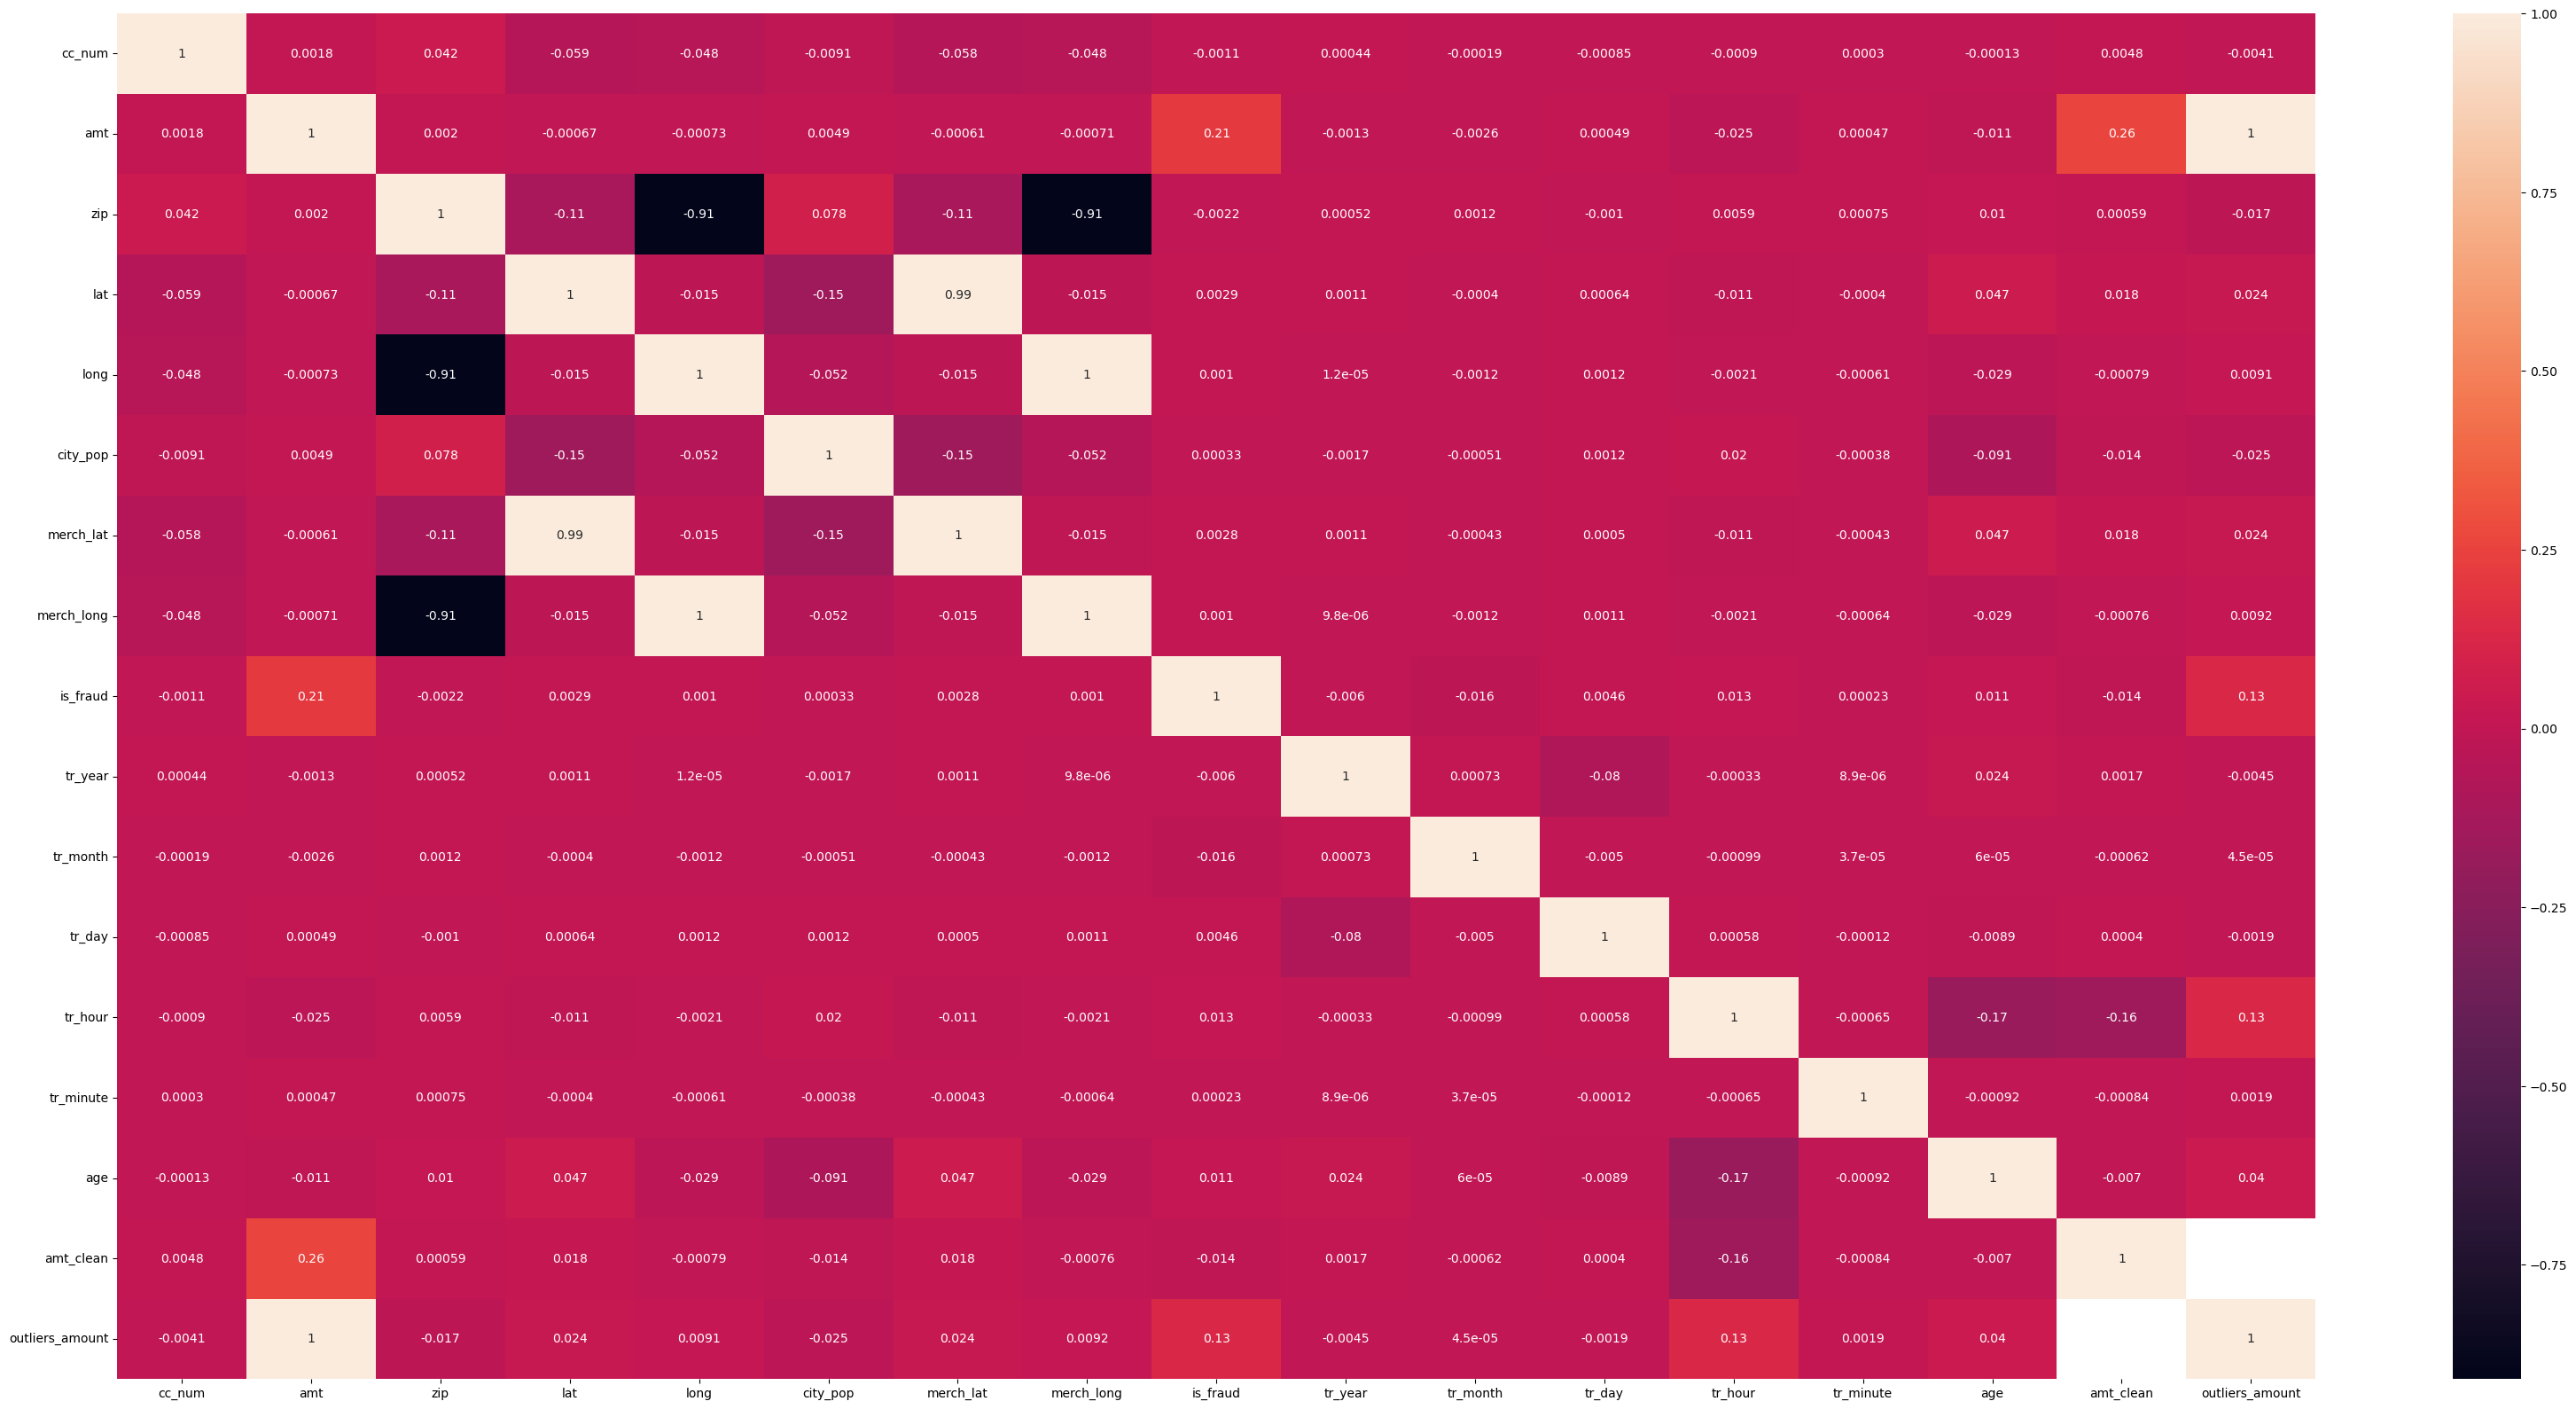

In [40]:
# plotted heatmap to visualize correlation between numerical features
plt.figure(figsize= (40,20))
sns.heatmap(numerical_feature.corr(), annot = True)

From heat map we can analyse that (lat and merch_lat),(long and merch_long) is highly positive corelated with each other, it means card holder resides near by merchant address.In addition amount and is_fruad is also positive corelated with each other but relation is weak.

In [41]:
# other option of geodesic is haversine because it is  100 time faster than geodesic.
# Vectorized Haversine distance between pairs of latitude/longitude points.
# If inputs are pandas Series, convert to NumPy and convert DEGREES -> RADIANS.
# np.radians is vectorized, so it efficiently handles whole arrays/Series

R_KM = 6371.0088  # mean Earth radius

def haversine_km(lat1, lon1, lat2, lon2):
    # inputs can be pandas Series; convert to numpy arrays
    lat1 = np.radians(lat1.to_numpy())
    lon1 = np.radians(lon1.to_numpy())
    lat2 = np.radians(lat2.to_numpy())
    lon2 = np.radians(lon2.to_numpy())

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    return 2 * R_KM * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

In [42]:
# Added distance columns in data set
#calculated distance between customer location(address) and merchant address
data['distance_cust_merchant_km'] = (haversine_km(data['lat'], data['long'], data['merch_lat'], data['merch_long']).round(2).astype('float32'))


In [43]:
numerical_feature = data.select_dtypes(include = 'number')
numerical_feature

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,amt_clean,outliers_amount,distance_cust_merchant_km
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,0,31,4.97,NaN,78.599998
1,630423337322,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,0,41,107.23,NaN,30.209999
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2019,1,1,0,0,57,47.45,220.11,108.209999
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1,52,45.00,NaN,95.669998
4,375534208663984,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,3,33,41.96,NaN,77.559998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,0,2020,12,3,23,59,54,43.77,NaN,77.029999
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0,2020,12,3,23,59,21,111.84,NaN,100.070000
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0,2020,12,3,23,59,39,86.88,NaN,80.760002
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,0,2020,12,3,23,59,55,7.99,NaN,52.930000


(array([ 34835., 105421., 175202., 245261., 315444., 357395., 315499.,
        221530.,  76319.,   5488.]),
 array([1.99999996e-02, 1.52299995e+01, 3.04399986e+01, 4.56499977e+01,
        6.08599968e+01, 7.60699921e+01, 9.12799911e+01, 1.06489990e+02,
        1.21699989e+02, 1.36909988e+02, 1.52119995e+02]),
 <BarContainer object of 10 artists>)

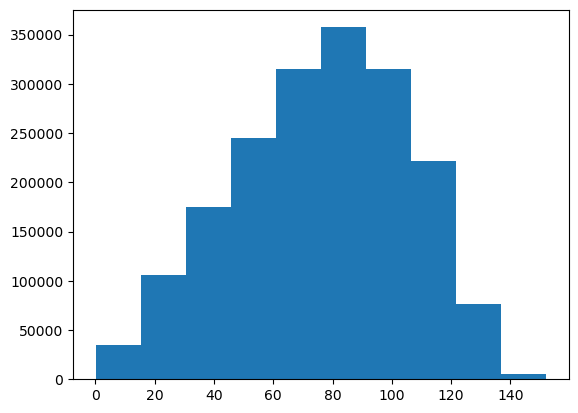

In [44]:
# plotted histogram of distance between customer and merchant 
plt.hist(data['distance_cust_merchant_km'])

In [45]:
#numerical_feature['distance_cust_merchant_km']

In [46]:
# 
ds_amt = data["distance_cust_merchant_km"].sort_values(ascending = False)
ds_amt.sort_values(ascending = False)



926894     152.119995
1562431    150.919998
216446     150.830002
161915     149.800003
252294     149.429993
              ...    
1526159      0.120000
42055        0.110000
273923       0.090000
556401       0.070000
381941       0.020000
Name: distance_cust_merchant_km, Length: 1852394, dtype: float32

In [47]:
print(ds_amt.value_counts().sort_values(ascending = False))

distance_cust_merchant_km
84.779999     291
83.519997     281
82.370003     280
86.330002     279
77.360001     279
             ... 
144.009995      1
144.229996      1
144.220001      1
145.250000      1
145.240005      1
Name: count, Length: 14547, dtype: int64


In [48]:
numerical_feature = numerical_feature.drop(columns = ['is_fraud','lat','long','merch_lat','merch_long'])

In [49]:
numerical_feature.columns

Index(['cc_num', 'amt', 'zip', 'city_pop', 'tr_year', 'tr_month', 'tr_day',
       'tr_hour', 'tr_minute', 'age', 'amt_clean', 'outliers_amount',
       'distance_cust_merchant_km'],
      dtype='object')

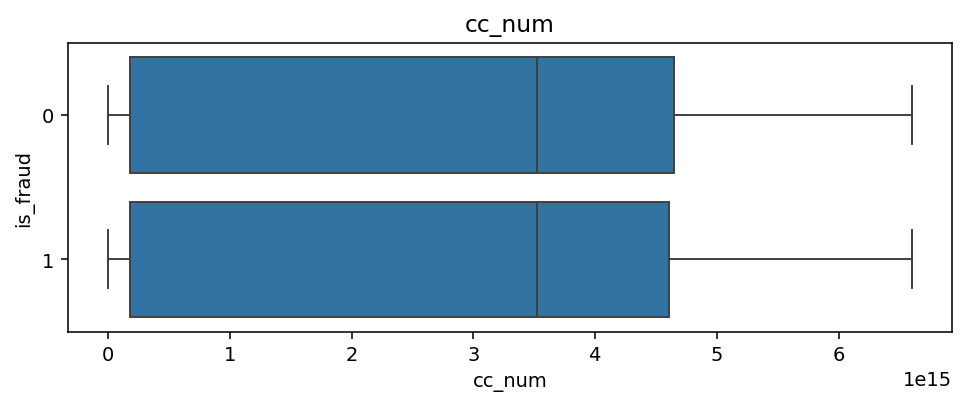

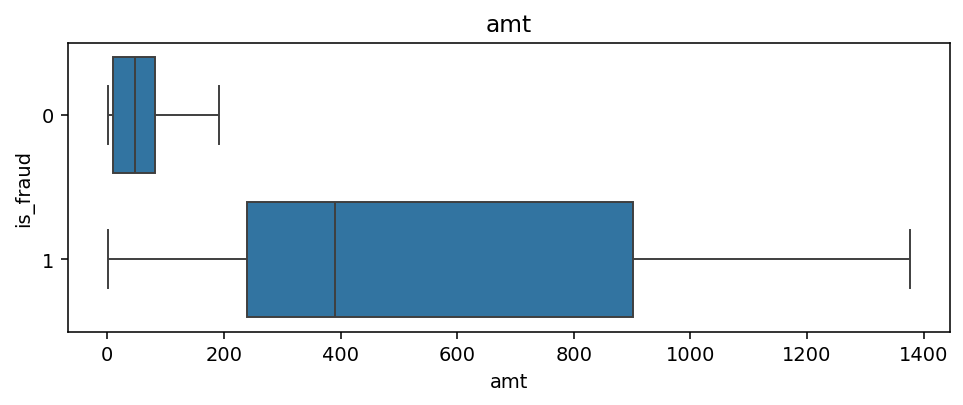

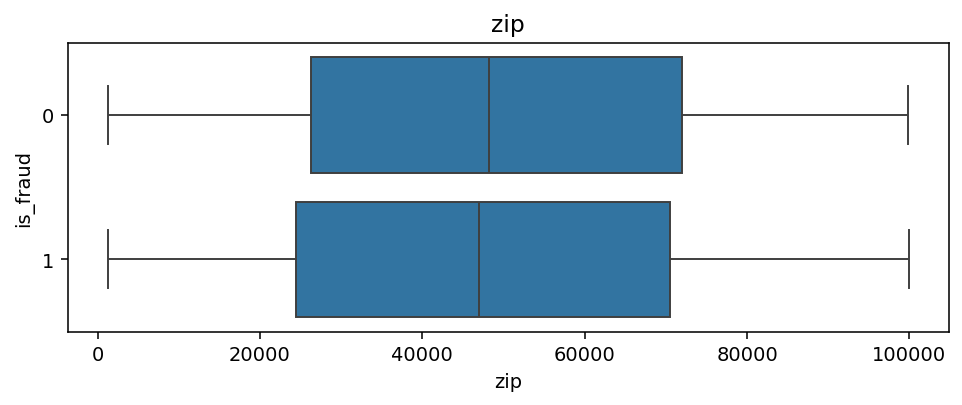

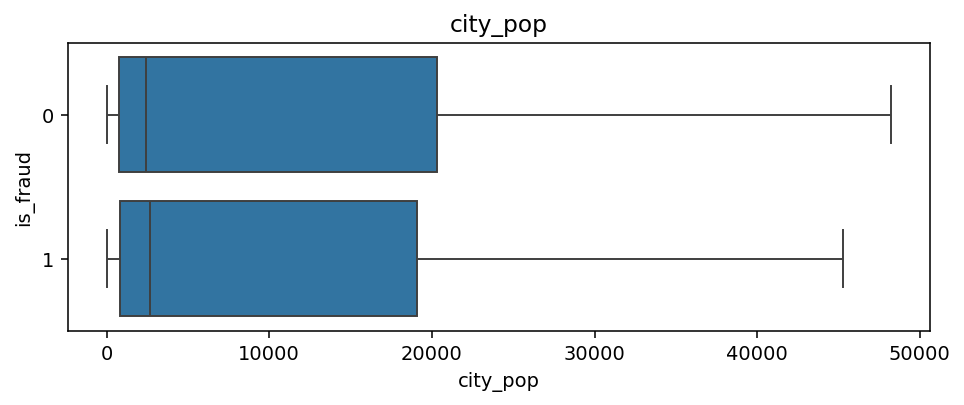

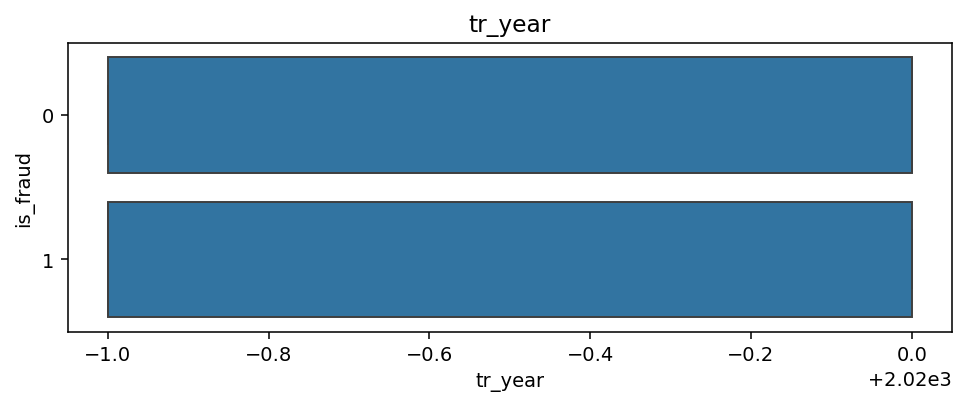

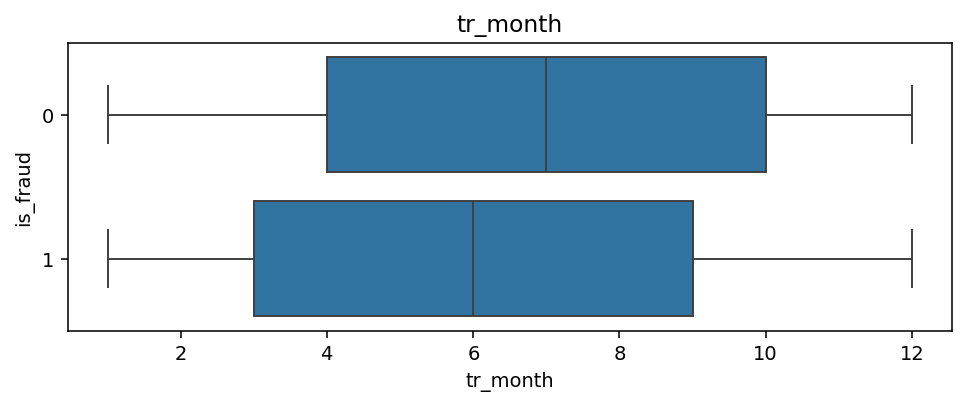

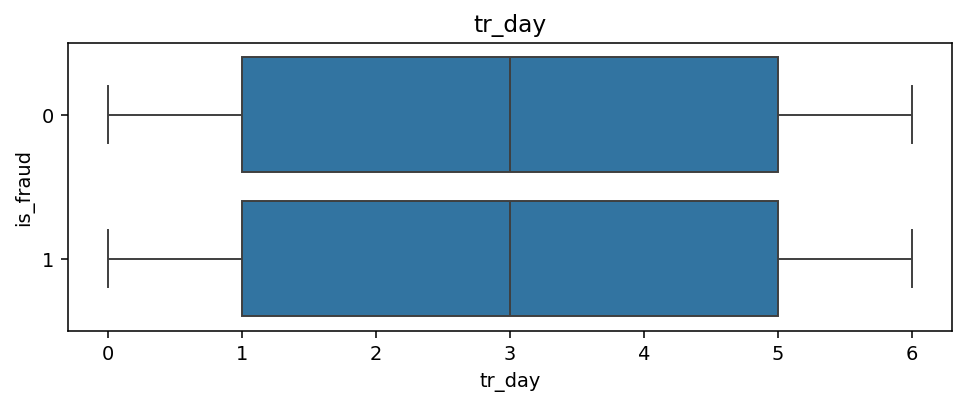

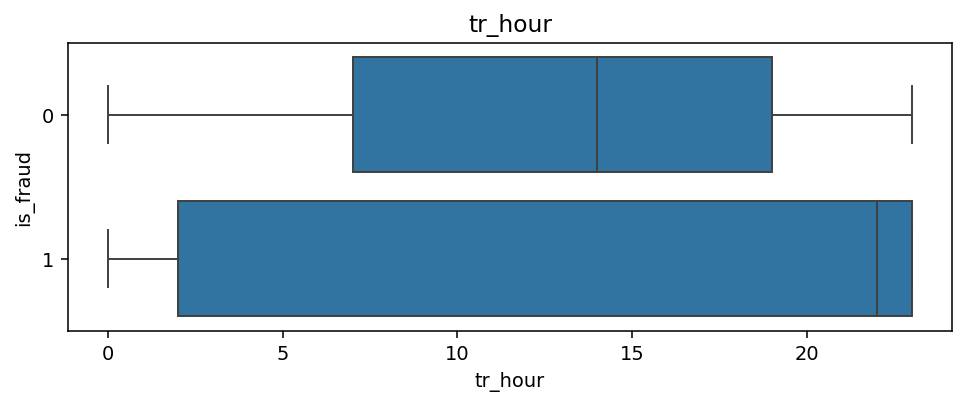

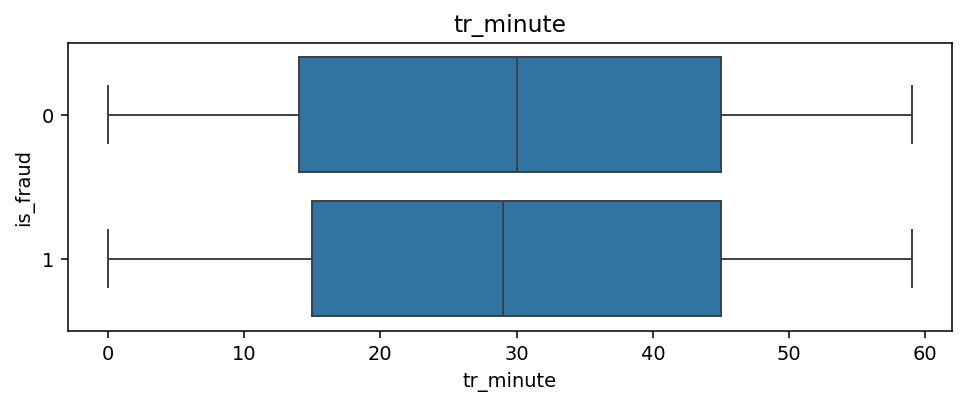

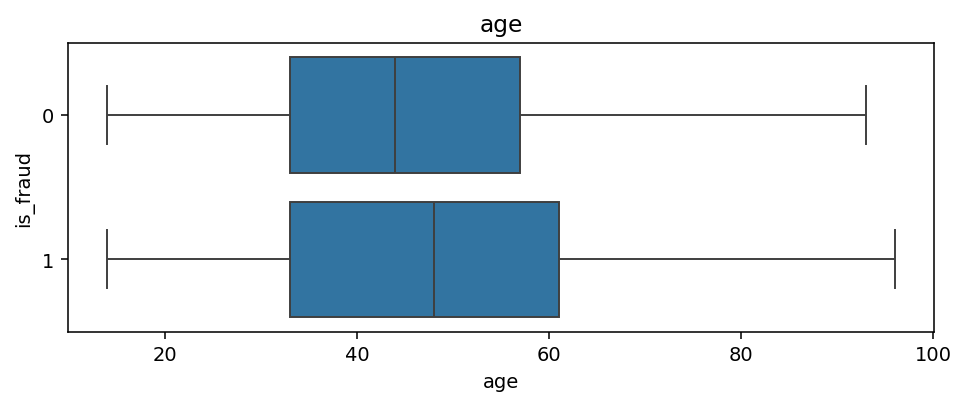

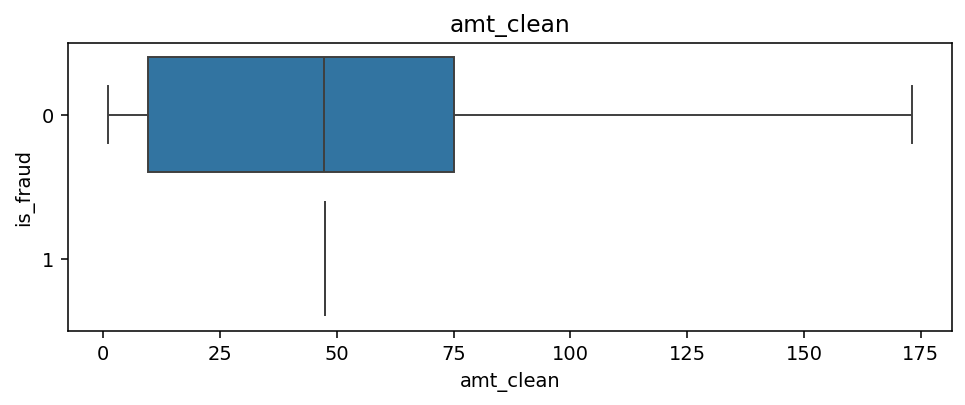

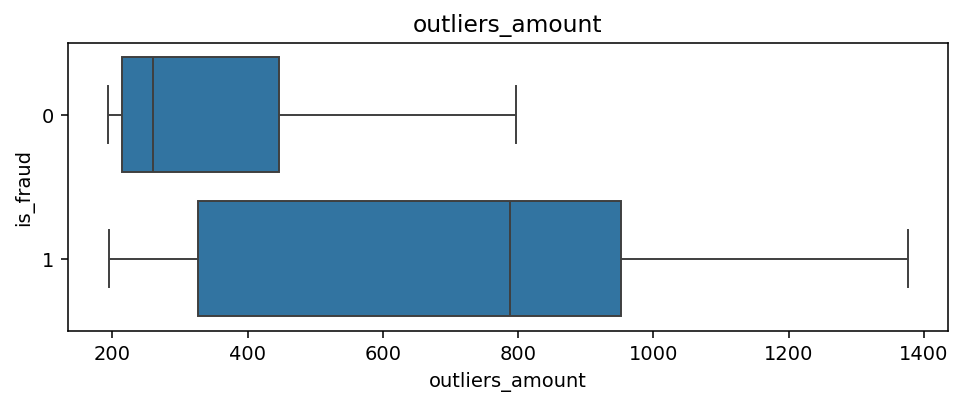

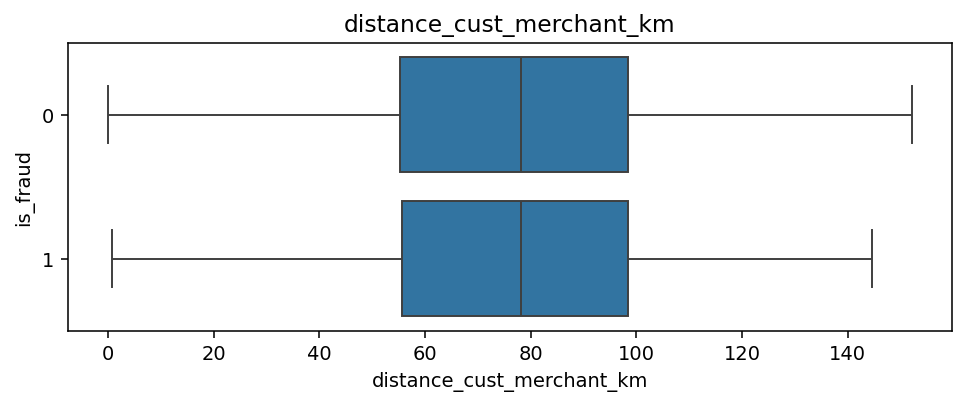

In [50]:
# box plot 
#dpi dots per inch. It controls the pixel density (resolution) of the figure that Matplotlib renders.
for c in numerical_feature:
    plt.figure(figsize=(7, 3), dpi=140)
    sns.boxplot(data=data, x=c, y= 'is_fraud', orient='h', showfliers=False)
    plt.title(f"{c}")
    plt.tight_layout(); plt.show()

In [51]:
data = data.drop(columns = 'outliers_amount')

### Categorical feature analysis

In [52]:
categorical_feature.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num', 'age_group', 'tr_day_name'],
      dtype='object')

In [53]:
categorical_feature['trans_num'].is_unique

True

In [54]:
#categorical feature analysis
#dropped transaction number because it is unique 
categorical_feature = categorical_feature.drop(columns='trans_num')

In [55]:
# counted value for each categorical feature, best way to count categorical variable is to calculate percenage 
cnt_df = pd.DataFrame()
for c in categorical_feature:
    print(c)
    cnt = data[c].value_counts(dropna=False)
    pct = data[c].value_counts(normalize = True,dropna=False)
    out = pd.DataFrame( {"count":cnt , "percent": (pct*100.0).round(2)}).head(30)
    out['cat_feature'] = [c] * len(out)
    out["cat_feature_values"] = out.index
    cnt_df = pd.concat([cnt_df,out],ignore_index=True)

merchant
category
first
last
gender
street
city
state
job
age_group
tr_day_name


In [56]:
cnt_df.head()

,count,percent,cat_feature,cat_feature_values
0,6262,0.34,merchant,fraud_Kilback LLC
1,5246,0.28,merchant,fraud_Cormier LLC
2,5195,0.28,merchant,fraud_Schumm PLC
3,5031,0.27,merchant,fraud_Kuhn LLC
4,4999,0.27,merchant,fraud_Boyer PLC


In [57]:
# groupby job 
 #  Group rows by the 'job' category #splits the data by each job title.['is_fraud'] 
 # focuses aggregations on the is_fraud column.
 # n='size'total rows per job,fraud_cnt='sum'=count of frauds per job, 
 # fraud_rate share of fraud, Sort jobs by highest fraud rate first
data.groupby('job')['is_fraud'].agg(n='size', fraud_cnt='sum', fraud_rate='mean').sort_values('fraud_rate', ascending=False)

,n,fraud_cnt,fraud_rate
job,,,
"Accountant, chartered",11,11,1.000000
Warehouse manager,7,7,1.000000
Careers adviser,15,15,1.000000
Solicitor,11,11,1.000000
Ship broker,7,7,1.000000
...,...,...,...
Health physicist,4374,3,0.000686
Contractor,4366,2,0.000458
"Engineer, communications",2190,0,0.000000


In [58]:
# varified the above fraud number in job and it true
#sum(list(data1[data1['job']=='Academic librarian']['is_fraud']))

In [59]:
categorical_feature.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'age_group', 'tr_day_name'],
      dtype='object')

In [60]:
# created function for all categorical feature 
# group by all category on fraud column and aggregated each category and get number of transaction and sum of fraud count and fraud rate for each category
df_gb = pd.DataFrame()
for i in categorical_feature:
    a = data.groupby(i)['is_fraud'].agg(n = 'size',fraud_cnt='sum',fraud_rate='mean').sort_values('fraud_rate', ascending=False)
    a["column"] = [i]*len(a)
    a['value'] = a.index
    df_gb = pd.concat([df_gb,a], ignore_index=True)
    #print(len(df_gb),len(a))
   # print(i,a)

In [61]:
df_gb.head()


,n,fraud_cnt,fraud_rate,column,value
0,2758,60,0.021755,merchant,fraud_Kozey-Boehm
1,1870,38,0.020321,merchant,"fraud_Herman, Treutel and Dickens"
2,2864,56,0.019553,merchant,fraud_Terry-Huel
3,2635,50,0.018975,merchant,fraud_Kerluke-Abshire
4,2821,53,0.018788,merchant,"fraud_Mosciski, Ziemann and Farrell"


In [62]:
#addedf fraud_rate_percent column in data_set

df_gb['fraud_rate_percent'] = df_gb['fraud_rate'] * 100.0

In [63]:
df_gb.head()

,n,fraud_cnt,fraud_rate,column,value,fraud_rate_percent
0,2758,60,0.021755,merchant,fraud_Kozey-Boehm,2.175489
1,1870,38,0.020321,merchant,"fraud_Herman, Treutel and Dickens",2.032086
2,2864,56,0.019553,merchant,fraud_Terry-Huel,1.955307
3,2635,50,0.018975,merchant,fraud_Kerluke-Abshire,1.897533
4,2821,53,0.018788,merchant,"fraud_Mosciski, Ziemann and Farrell",1.878766


In [64]:
# sorted data frame on 'fraud_rate_percent' in descending order
df_gb = df_gb.sort_values('fraud_rate_percent', ascending = False)

In [65]:
df_gb.head(10)

,n,fraud_cnt,fraud_rate,column,value,fraud_rate_percent
710,9,9,1.0,first,Nicole,100.0
711,8,8,1.0,first,Molly,100.0
712,8,8,1.0,first,Phyllis,100.0
713,10,10,1.0,first,Bruce,100.0
707,9,9,1.0,first,Calvin,100.0
708,7,7,1.0,first,Samantha,100.0
709,9,9,1.0,first,Cameron,100.0
722,11,11,1.0,first,Colleen,100.0
723,19,19,1.0,first,Chelsea,100.0
724,13,13,1.0,first,Meagan,100.0


In [66]:
# filtered column on merchant and sorted it on fraud_rate_percent" in descending order
# sorted fraud rate percent on merchant column in decresing order 
dfm = df_gb.loc[df_gb["column"]=="merchant"].sort_values("fraud_rate_percent", ascending=False)
print(dfm.shape)
dfm.head()

(693, 6)


,n,fraud_cnt,fraud_rate,column,value,fraud_rate_percent
0,2758,60,0.021755,merchant,fraud_Kozey-Boehm,2.175489
1,1870,38,0.020321,merchant,"fraud_Herman, Treutel and Dickens",2.032086
2,2864,56,0.019553,merchant,fraud_Terry-Huel,1.955307
3,2635,50,0.018975,merchant,fraud_Kerluke-Abshire,1.897533
4,2821,53,0.018788,merchant,"fraud_Mosciski, Ziemann and Farrell",1.878766


# # #  not able to plot merchant vs fraud rate percent so filter out number of trasaction > than average number of transaction on merchant level, got top 10 merchant with higher number of trasaction

In [67]:
# on merchant level checked all transactin number( n) and also calculated mean number of transaction 
#filter out number of merchant transaction that is greater than average number of merchant transaction and sorted it in descending order on fraud_rate_percent

dfm[dfm["n"]>=np.mean(dfm["n"])].head(10)


,n,fraud_cnt,fraud_rate,column,value,fraud_rate_percent
0,2758,60,0.021755,merchant,fraud_Kozey-Boehm,2.175489
2,2864,56,0.019553,merchant,fraud_Terry-Huel,1.955307
4,2821,53,0.018788,merchant,"fraud_Mosciski, Ziemann and Farrell",1.878766
5,2788,52,0.018651,merchant,"fraud_Schmeler, Bashirian and Price",1.865136
6,2842,53,0.018649,merchant,fraud_Kuhic LLC,1.864884
7,2757,51,0.018498,merchant,fraud_Jast Ltd,1.849837
8,2817,52,0.018459,merchant,"fraud_Langworth, Boehm and Gulgowski",1.845935
9,2767,51,0.018432,merchant,"fraud_Romaguera, Cruickshank and Greenholt",1.843151
10,2779,51,0.018352,merchant,fraud_Boyer-Reichert,1.835193
11,2786,51,0.018306,merchant,"fraud_Heathcote, Yost and Kertzmann",1.830581


In [68]:
# on city level checked all trasaction ( n) on city level  and also calculated mean number of transaction on city level
#filter out number of city transaction that is greater than average number of city transaction sorted it on fraud_rate_percent on descending order 
dfm = df_gb.loc[df_gb["column"]=="city"].sort_values("fraud_rate_percent", ascending=False)
print(dfm.shape)
dfm.head()

(906, 6)


,n,fraud_cnt,fraud_rate,column,value,fraud_rate_percent
2611,11,11,1.0,city,Walkertown,100.0
2609,10,10,1.0,city,Nanuet,100.0
2608,7,7,1.0,city,Norfolk,100.0
2602,9,9,1.0,city,North East,100.0
2617,11,11,1.0,city,Roland,100.0


In [69]:
dfm[dfm['n'] >= np.mean(dfm['n'])].head(10)

,n,fraud_cnt,fraud_rate,column,value,fraud_rate_percent
2750,2209,25,0.011317,city,Randolph,1.131734
2771,2212,24,0.010850,city,Beaver Falls,1.084991
2774,2207,23,0.010421,city,Des Moines,1.042139
2794,3680,35,0.009511,city,New York City,0.951087
2804,3678,34,0.009244,city,Camden,0.924415
2805,2201,20,0.009087,city,Arlington,0.908678
2806,2203,20,0.009079,city,Kenner,0.907853
2817,2201,19,0.008632,city,Minneapolis,0.863244
2823,2199,18,0.008186,city,Deane,0.818554
2842,2206,18,0.008160,city,West Palm Beach,0.815956


In [70]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name,amt_clean,distance_cust_merchant_km
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2019,1,1,0,0,31,adult,Tuesday,4.97,78.599998
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2019,1,1,0,0,41,adult,Tuesday,107.23,30.209999
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2019,1,1,0,0,57,senior,Tuesday,47.45,108.209999
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2019,1,1,0,1,52,senior,Tuesday,45.00,95.669998
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2019,1,1,0,3,33,adult,Tuesday,41.96,77.559998


In [71]:
data.shape

(1852394, 31)

In [72]:
# found unique category from data set and converted it into list
#set(list(data["category"]))

In [73]:
# on main data, groupby by city and is_fraud on amount and counted fraud transaaction 
# computes fraud transaction counts per city, sorts them descending, and shows the top 20.
city_amt_df = data.groupby(["city", "is_fraud"])["amt"].agg("count")
city_amt_df = pd.DataFrame(city_amt_df).reset_index().sort_values("amt", ascending= False)
city_amt_df =city_amt_df[city_amt_df["is_fraud"]==1]
city_amt_df.columns = ["city", "is_fraud", "fraud_count"]
city_amt_df.head(20)

,city,is_fraud,fraud_count
695,Houston,1,39
369,Dallas,1,39
142,Birmingham,1,36
1087,New York City,1,35
226,Camden,1,34
23,Allentown,1,34
407,Detroit,1,33
1615,Warren,1,33
1618,Washington,1,31
51,Arcadia,1,30


In [74]:
#Show the top 20 merchants by number of fraudulent transactions.
# grupby data on merchant and is_fraud on amount and counted number of top 20 fraud count.
merchant_amt_df = data.groupby(["merchant", "is_fraud"])["amt"].agg("count")
merchant_amt_df = pd.DataFrame(merchant_amt_df).reset_index().sort_values("amt", ascending= False)
merchant_amt_df = merchant_amt_df[merchant_amt_df["is_fraud"]==1]
merchant_amt_df.columns = ["merchant", "is_fraud", "fraud_count"]
merchant_amt_df.head(20)
# sns.barplot(data=gender_amt_df, x= "gender",y= "amt", hue = "is_fraud")
# plt.xticks(rotation=90)
# plt.tight_layout()

,merchant,is_fraud,fraud_count
631,fraud_Kilback LLC,1,62
673,fraud_Kozey-Boehm,1,60
985,fraud_Rau and Sons,1,60
293,fraud_Doyle Ltd,1,57
1226,fraud_Terry-Huel,1,56
697,fraud_Kuhn LLC,1,55
141,fraud_Boyer PLC,1,55
854,"fraud_Moen, Reinger and Murphy",1,53
691,fraud_Kuhic LLC,1,53
617,fraud_Kiehn-Emmerich,1,53


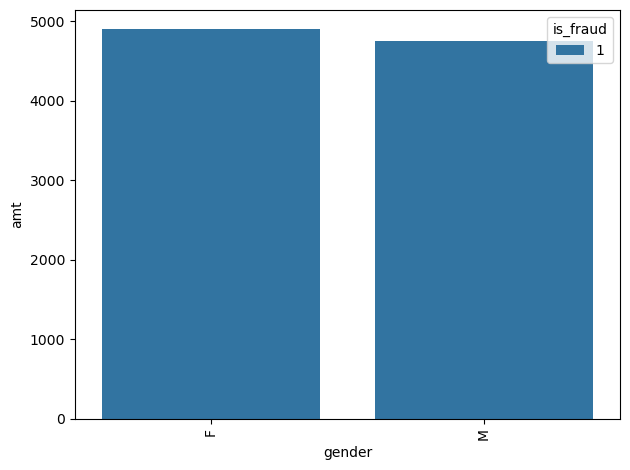

In [75]:
# Group by gender and fraud flag,on amt column then count transactions in each group
gender_amt_df = data.groupby(["gender", "is_fraud"])["amt"].agg("count")
gender_amt_df = pd.DataFrame(gender_amt_df).reset_index()
gender_amt_df = gender_amt_df[gender_amt_df["is_fraud"]==1]
sns.barplot(data=gender_amt_df, x= "gender",y= "amt", hue = "is_fraud")
plt.xticks(rotation=90)
plt.tight_layout()

In [77]:

# Group the data by gender and fraud flag, then compute the average transaction
gender_amt_df = data.groupby(["gender", "is_fraud"])["amt"].agg("mean")


In [78]:
gender_amt_df = pd.DataFrame(gender_amt_df).reset_index()
gender_amt_df

,gender,is_fraud,amt
0,F,0,67.916593
1,F,1,490.456538
2,M,0,67.329593
3,M,1,572.109998


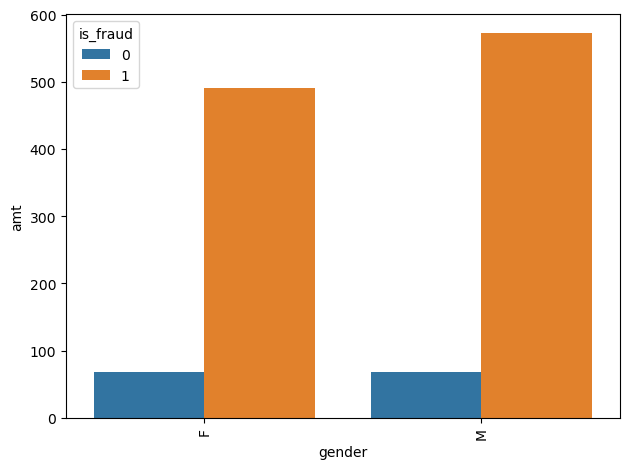

In [79]:
# average fraud trasaction by gender so here male fraud average trasaction amnt is 580 and female has 500.
sns.barplot(data=gender_amt_df, x= "gender",y= "amt", hue = "is_fraud")
plt.xticks(rotation=90)
plt.tight_layout()

In [80]:
#group by tr_year and is_fraud on amount and calculated average fraud amount on year wise
yr_amt_df = data.groupby(['tr_year', "is_fraud"])["amt"].agg("mean")
yr_amt_df = pd.DataFrame(yr_amt_df).reset_index()
yr_amt_df

,tr_year,is_fraud,amt
0,2019,0,67.654524
1,2019,1,530.234266
2,2020,0,67.648044
3,2020,1,531.164617


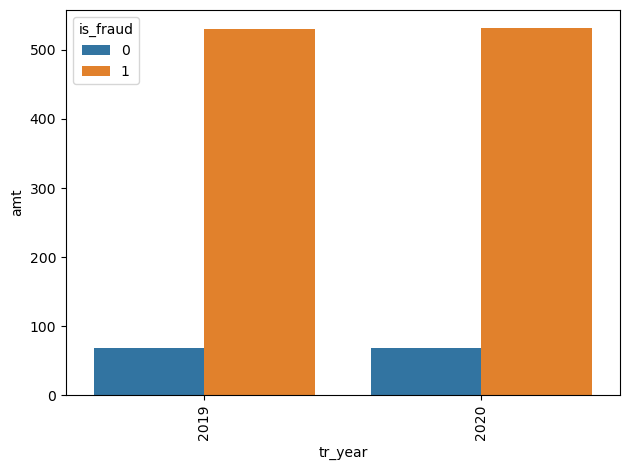

In [81]:
sns.barplot(data=yr_amt_df, x='tr_year' ,y= "amt", hue = "is_fraud")
plt.xticks(rotation=90)
plt.tight_layout()

In [82]:
# on data group by category and is_fraud on amount and calculate average fraud amount by each category.
cat_amt_df = data.groupby(["category", "is_fraud"])["amt"].agg("mean") # did try sum also

In [83]:
cat_amt_df = pd.DataFrame(cat_amt_df).reset_index()
cat_amt_df.head()

,category,is_fraud,amt
0,entertainment,0,63.181494
1,entertainment,1,504.794384
2,food_dining,0,50.884652
3,food_dining,1,120.678829
4,gas_transport,0,63.688542


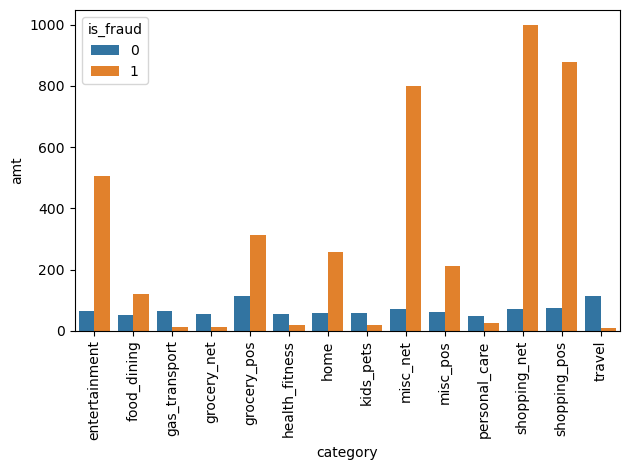

In [84]:
sns.barplot(data=cat_amt_df, x= "category",y= "amt", hue = "is_fraud")
plt.xticks(rotation=90)
plt.tight_layout()

In [85]:
# on data group by ctr_day_name and is_fraud on amount and calculate count of transaction  by each tr_day_name
day_amt_df = data.groupby(["tr_day_name", "is_fraud"])["amt"].agg("count")
day_amt_df = pd.DataFrame(day_amt_df).reset_index()
day_amt_df.head()

,tr_day_name,is_fraud,amt
0,Friday,0,213702
1,Friday,1,1376
2,Monday,0,367934
3,Monday,1,1484
4,Saturday,0,261734


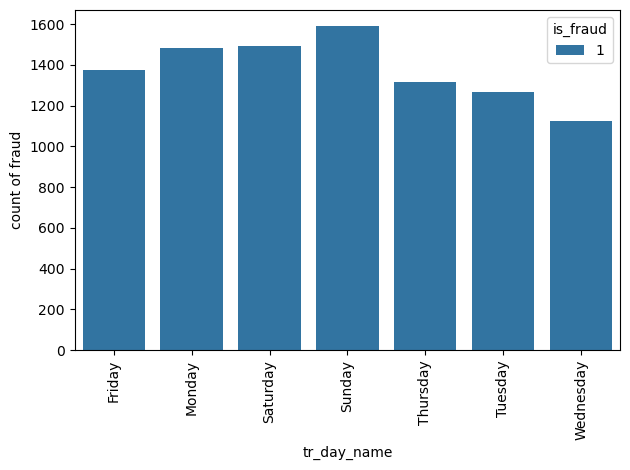

In [86]:
sns.barplot(data=day_amt_df[day_amt_df["is_fraud"]==1], x= "tr_day_name",y= "amt", hue = "is_fraud")
plt.xticks(rotation=90)
plt.ylabel("count of fraud")
plt.tight_layout()

In [87]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name,amt_clean,distance_cust_merchant_km
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2019,1,1,0,0,31,adult,Tuesday,4.97,78.599998
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2019,1,1,0,0,41,adult,Tuesday,107.23,30.209999
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2019,1,1,0,0,57,senior,Tuesday,47.45,108.209999
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2019,1,1,0,1,52,senior,Tuesday,45.00,95.669998
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2019,1,1,0,3,33,adult,Tuesday,41.96,77.559998


In [88]:
age_group_amt_df = data.groupby(["age_group", "is_fraud"])["amt"].agg("mean")
age_group_amt_df = pd.DataFrame(age_group_amt_df).reset_index()
age_group_amt_df.head()

,age_group,is_fraud,amt
0,adult,0,70.552145
1,adult,1,497.627089
2,senior,0,62.653935
3,senior,1,568.048514
4,teen,0,62.298210


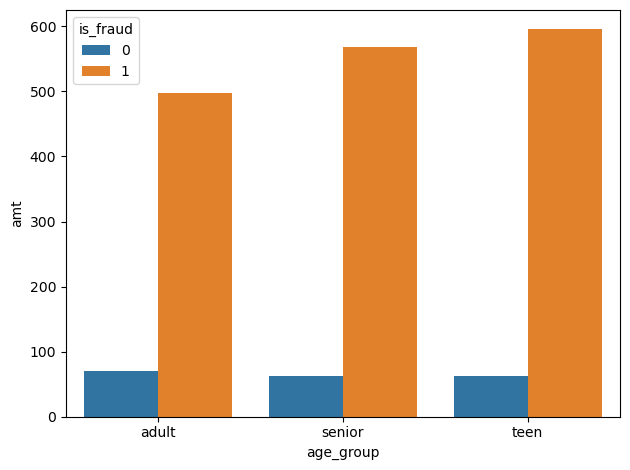

In [89]:
sns.barplot(data=age_group_amt_df, x= "age_group",y= "amt", hue = "is_fraud")
#plt.xticks(rotation=90)
plt.tight_layout()

### Hypothesis test

In [90]:
no_fraud_amt = data.loc[data['is_fraud']==0 ,'amt']
no_fraud_amt_sorted = no_fraud_amt.sort_values(ascending=False)
no_fraud_amt_sorted

787549     28948.90
793677     27390.12
1234797    27119.77
606211     26544.12
352894     25086.94
             ...   
1718181        1.00
974124         1.00
1838226        1.00
626695         1.00
888883         1.00
Name: amt, Length: 1842743, dtype: float64

(array([1.842177e+06, 4.180000e+02, 8.500000e+01, 2.600000e+01,
        2.000000e+01, 8.000000e+00, 2.000000e+00, 2.000000e+00,
        1.000000e+00, 4.000000e+00]),
 array([1.000000e+00, 2.895790e+03, 5.790580e+03, 8.685370e+03,
        1.158016e+04, 1.447495e+04, 1.736974e+04, 2.026453e+04,
        2.315932e+04, 2.605411e+04, 2.894890e+04]),
 <BarContainer object of 10 artists>)

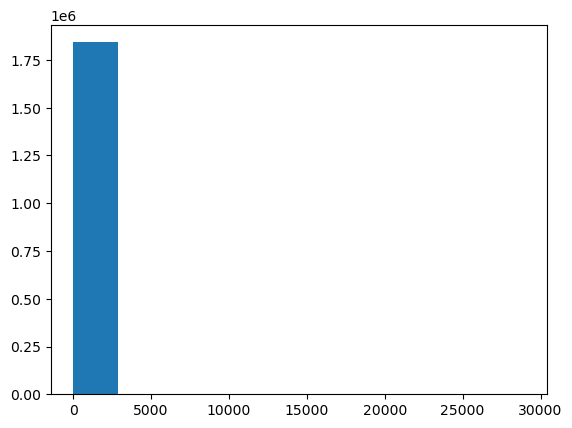

In [91]:
plt.hist(no_fraud_amt)

In [92]:
Fraud_amnt = data.loc[data['is_fraud']==1 ,'amt'] # series # dataframe data1.loc[data1['is_fraud'] == 1, ['amt']]
Fraud_amnt_sorted = Fraud_amnt.sort_values(ascending=False)
Fraud_amnt_sorted

1262544    1376.04
514148     1371.81
30239      1334.07
1258483    1324.80
1570853    1320.92
            ...   
1593436       1.78
681357        1.51
328290        1.18
201737        1.18
1065872       1.06
Name: amt, Length: 9651, dtype: float64

(array([2310.,  383., 2159.,  179.,  229., 1125., 1585., 1290.,  360.,
          31.]),
 array([1.060000e+00, 1.385580e+02, 2.760560e+02, 4.135540e+02,
        5.510520e+02, 6.885500e+02, 8.260480e+02, 9.635460e+02,
        1.101044e+03, 1.238542e+03, 1.376040e+03]),
 <BarContainer object of 10 artists>)

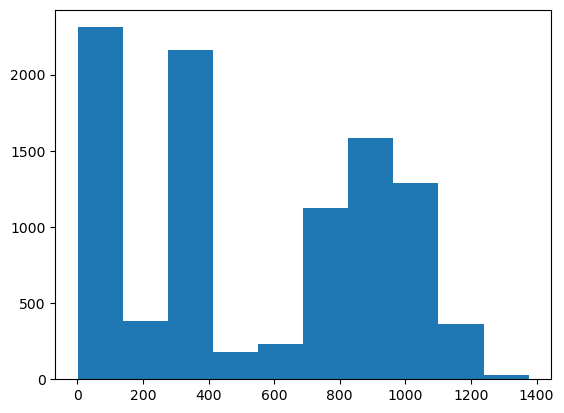

In [93]:
plt.hist(Fraud_amnt)

In [94]:
# tstatistic and p value without log
x = no_fraud_amt
y= Fraud_amnt
tstatistic, p_value = stats.ttest_ind(x,y,equal_var = False)

tstatistic, p_value

(np.float64(-116.27665739243675), np.float64(0.0))

p value is almost zero so we can reject hypothesis and t value is negative it means no_fraud_amt mean is < mean Fraud_amnt 


In [95]:
x = len(no_fraud_amt)
y = len(Fraud_amnt)
print(x,y)

1842743 9651


In [96]:
# tstatistic and p value with log scale and two sided test with varience is not equal 
# that is SciPy does Welch’s t-test (unequal variances) with a different SE and df (Welch–Satterthwaite).

x_log= np.log1p(no_fraud_amt)
y_log = np.log1p(Fraud_amnt)

tstatistic, p_value = stats.ttest_ind(x_log,y_log, equal_var = False)

tstatistic, p_value

(np.float64(-124.05401600848147), np.float64(0.0))

p value is almost zero so we can reject hypothesis and t value is negative it means no_fraud_amt mean is < mean Fraud_amnt 

In [97]:
mean_nf = x_log.mean() 
mean_f  = y_log.mean()

mean_nf

mean_f 

np.float64(5.566713248536973)

In [98]:
# one tailed test null hypothesis mean_non-fraud = mean_fraud or (mean(log(1+amount)_fraud) = mean(log(1+amount)_nonfraud).
# alternative  mean_non-fraud < mean_fraud 
#(x_log, y_log) = (nonfraud, fraud), use alternative='less'
# Welch's t-test for unequal variance
tstatistic1, p1 = stats.ttest_ind(x_log,y_log, equal_var = False, alternative = 'less')
print(tstatistic1, p1)

-124.05401600848147 0.0


p ~ 0 so reject Hypothesis On the log1p scale, fraud transactions have a higher mean amount than non-fraud. In practical terms, fraud amounts are larger on average.

In [99]:
# geometric-mean ratio (fraud vs non-fraud)
diff = y_log.mean() - x_log.mean() # mean difference on log1p scale  
 # point estimate of ratio  (fraud / non-fraud) 
ratio = np.exp(diff)

In [100]:
va = y_log.var(ddof =1) 
vb = x_log.var(ddof =1) # sample variances of the log1p amounts for fraud (y_log) and non-fraud (x_log).makes them unbiased variances (divide by n−1).
na = len( y_log)
nb = len(x_log)
se = np.sqrt(va/na + vb/nb)
print("se value:",se)
#df = Welch–Satterthwaite degrees of freedom, an approximation used when variances are unequal
df = (va/na + vb/nb)**2 / ((va**2)/(na**2*(na-1)) + (vb**2)/(nb**2*(nb-1)))
t_95 = stats.t.ppf(0.975,df)
print("T value :", t_95)
#Critical t-value for a 95% two-sided CI (0.975 is 1−α/2 with α=0.05).
low, high = np.exp([diff-(t_95*se), diff + (t_95*se)])

print(f"Fraud ≈ {ratio:.2f}× non-fraud (GM). 95% CI [{low:.2f}×, {high:.2f}×]")
# here ratio on log scale so it i giving (1+X) but if we want to calculate only X then 

se value: 0.016489989910392733
T value : 1.960208245948282
Fraud ≈ 7.73× non-fraud (GM). 95% CI [7.49×, 7.99×]


In [101]:
### ratio ≈ 7.73.00×non-fraud, CI [7.49×, 7.99×]

In [102]:
#Typical amounts (geometric means)
gm_fraud = np.expm1(y_log.mean()) 
# geometric-mean fraud amount
#np.expm1(z) computes exp(z) − 1 with high numerical accuracy (especially when z is small).
#It’s the inverse of np.log1p(x) (which is log(1 + x)):
gm_no_fraud   = np.expm1(x_log.mean())   # geometric-mean non-fraud amount
ratio_amt =gm_fraud / gm_no_fraud
print(f"Fraud ≈ {ratio_amt:.2f}× non-fraud (GM)")

Fraud ≈ 7.94× non-fraud (GM)


In [103]:
se_y = np.sqrt(va/na)
se_x = np.sqrt(vb/nb)
tcrit_y = stats.t.ppf(0.975, na-1)
tcrit_x = stats.t.ppf(0.975, nb-1)
gm_fraud_low, gm_fraud_high = np.expm1([y_log.mean() - tcrit_y*se_y, y_log.mean() + tcrit_y*se_y])
gm_non_low,   gm_non_high   = np.expm1([x_log.mean() - tcrit_x*se_x, x_log.mean() + tcrit_x*se_x])
print(f"GM non-fraud: {gm_no_fraud:.2f}  (95% CI [{gm_non_low:.2f}, {gm_non_high:.2f}])")
print(f"GM fraud : {gm_fraud:.2f}  (95% CI [{gm_fraud_low:.2f}, {gm_fraud_high:.2f}])")

GM non-fraud: 32.82  (95% CI [32.76, 32.88])
GM fraud : 260.57  (95% CI [252.27, 269.15])


In [104]:
x 
y 
print(x,y)

1842743 9651


In [105]:
no_fraud1 = np.mean(x)
fraud1 =  np.mean(y)
se_y = np.sqrt(va/na)
se_x = np.sqrt(vb/nb)
tcrit_y = stats.t.ppf(0.975, na-1)
tcrit_x = stats.t.ppf(0.975, nb-1)
gm_fraud_low, gm_fraud_high = np.mean(y) - tcrit_y*se_y, np.mean(y) + tcrit_y*se_y
print(f"GM fraud : {fraud1:.2f}  (95% CI [{gm_fraud_low:.2f}, {gm_fraud_high:.2f}])")

GM fraud : 9651.00  (95% CI [9650.97, 9651.03])


In [106]:

data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name,amt_clean,distance_cust_merchant_km
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2019,1,1,0,0,31,adult,Tuesday,4.97,78.599998
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2019,1,1,0,0,41,adult,Tuesday,107.23,30.209999
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2019,1,1,0,0,57,senior,Tuesday,47.45,108.209999
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2019,1,1,0,1,52,senior,Tuesday,45.00,95.669998
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2019,1,1,0,3,33,adult,Tuesday,41.96,77.559998


how to use this file in modelling do i need to add more column in it and what are the columns I should keep and can i remove column like cc_num, trasa_num, unix_time etc
from EDA this data is the main file or should i improve  it more.

### balancing data set by using smote Sampling technique 


In [113]:
data.head()
print(data.shape)
print(data.columns)

(1852394, 31)
Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'tr_year', 'tr_month', 'tr_day', 'tr_hour', 'tr_minute', 'age',
       'age_group', 'tr_day_name', 'amt_clean', 'distance_cust_merchant_km'],
      dtype='object')


In [110]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,tr_year,tr_month,tr_day,tr_hour,tr_minute,age,age_group,tr_day_name,amt_clean,distance_cust_merchant_km
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2019,1,1,0,0,31,adult,Tuesday,4.97,78.599998
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2019,1,1,0,0,41,adult,Tuesday,107.23,30.209999
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2019,1,1,0,0,57,senior,Tuesday,47.45,108.209999
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2019,1,1,0,1,52,senior,Tuesday,45.00,95.669998
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2019,1,1,0,3,33,adult,Tuesday,41.96,77.559998


In [131]:
#group_keys=False index stays as the original_index only
data_s = data.groupby('is_fraud', group_keys=False).sample(frac=0.055, random_state=42)

In [132]:
data_s.shape

(101882, 31)